# Notebook to measure the frequency reponse of a system based on a self-sensing VCA

## Generate frequency sweep signal

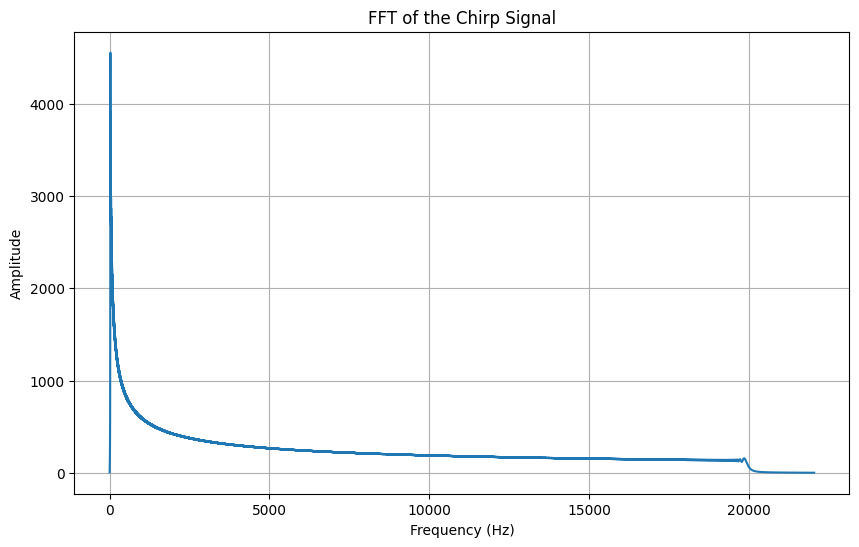

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, welch
from scipy.fft import fft, fftfreq
from scipy.io.wavfile import write


fs = 44100  # Sample rate
T = 5.0   # Duration in seconds
t = np.linspace(0, T, int(fs*T), endpoint=False)

input_signal = chirp(t, f0=20, f1=20000, t1=T, method='logarithmic')
input_signal_fft = fft(input_signal)
frequencies = fftfreq(len(input_signal), 1/fs)

# Plot the FFT result
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(input_signal_fft)[:len(frequencies)//2])
plt.title('FFT of the Chirp Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

# Convert the signal to 32-bit float
input_signal_32bit = np.float32(input_signal)
write('sweep_signal.wav', fs, input_signal_32bit)


## Visualize response

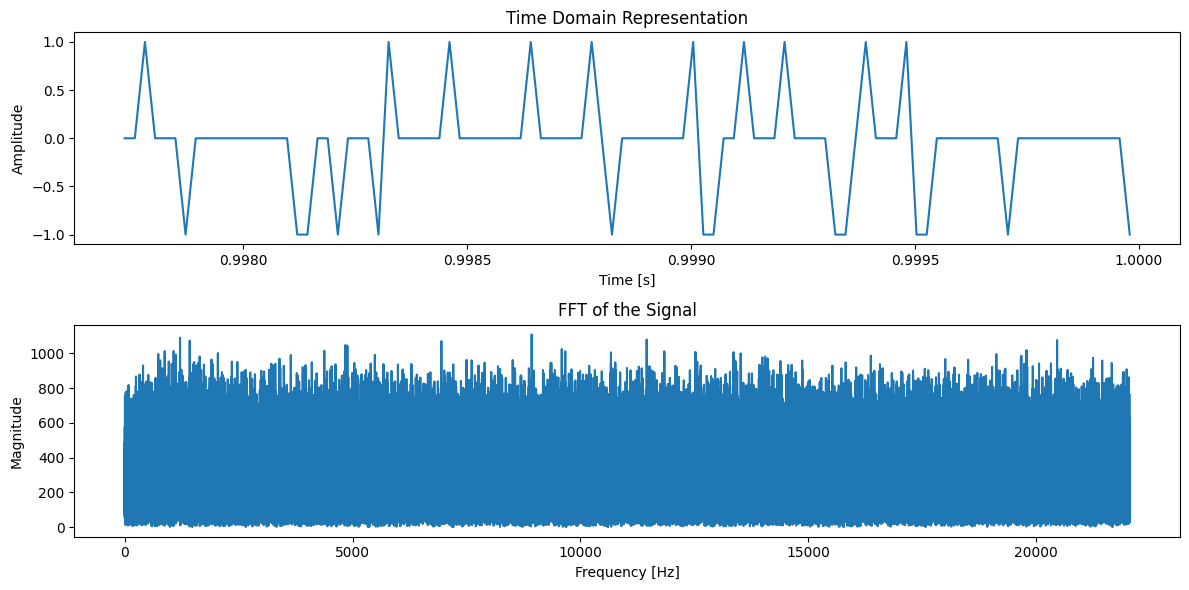

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def plot_file (name):
    rate, data = wavfile.read(name)
    if data.ndim > 1:
        data = data[:, 0]
    t = np.linspace(0, len(data) / rate, num=len(data))



    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t[44000:44100], data[44000:44100])
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('Time Domain Representation')
    N = len(data)
    yf = np.fft.fft(data)
    xf = np.fft.fftfreq(N, 1 / rate)
    plt.subplot(2, 1, 2)
    plt.plot(xf[:N // 2], np.abs(yf[:N // 2]))
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.title('FFT of the Signal')
    plt.tight_layout()
    plt.show()

# plot_file('sweep_signal.wav')
plot_file('guitar_response.wav')
# plot_file('response.wav')